# Explainig the dataset

# Import the data

In [1]:
import pandas as pd
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [2]:
avo_df = pd.read_csv('ADANIPORTS.csv')

In [4]:
avo_df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,2021-04-26,ADANIPORTS,EQ,725.35,733.00,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892
3318,2021-04-27,ADANIPORTS,EQ,730.75,735.00,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.00,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.20,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942


In [19]:
avo_df['Symbol'].value_counts()

ADANIPORTS    2299
MUNDRAPORT    1023
Name: Symbol, dtype: int64

# Exploring the data

In [5]:
avo_df.head(5)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [6]:
avo_df.tail(3)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.0,760.00,741.1,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.2,765.85,743.4,746.4,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942
3321,2021-04-30,ADANIPORTS,EQ,746.75,739.0,759.45,724.5,726.4,730.05,743.35,12600934,9.366911e+14,132141.0,3514692,0.2789


In [7]:
#sorting the dataframe based on date
avo_df = avo_df.sort_values("Date")
avo_df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,2021-04-26,ADANIPORTS,EQ,725.35,733.00,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892
3318,2021-04-27,ADANIPORTS,EQ,730.75,735.00,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.00,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.20,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942


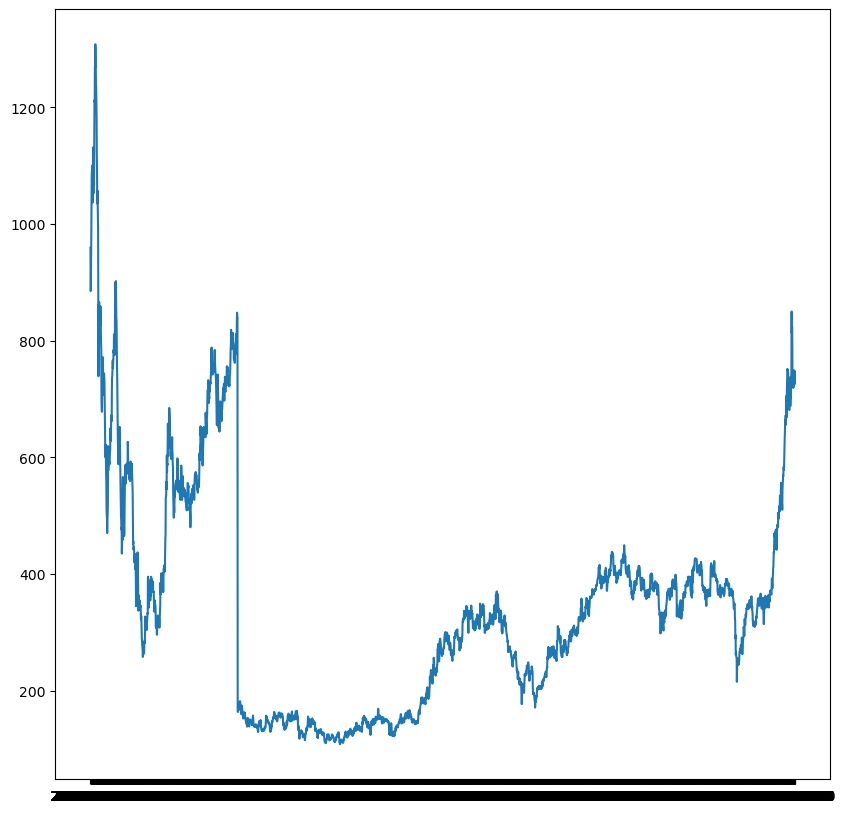

In [8]:
plt.figure(figsize=(10,10))
plt.plot(avo_df['Date'], avo_df['Last'])

(array([   0,    1,    2, ..., 2441, 2442, 2443]),
 [Text(0, 0, '108.0'),
  Text(1, 0, '109.0'),
  Text(2, 0, '110.0'),
  Text(3, 0, '110.5'),
  Text(4, 0, '110.75'),
  Text(5, 0, '111.0'),
  Text(6, 0, '111.5'),
  Text(7, 0, '111.8'),
  Text(8, 0, '111.85'),
  Text(9, 0, '112.0'),
  Text(10, 0, '112.1'),
  Text(11, 0, '112.2'),
  Text(12, 0, '112.5'),
  Text(13, 0, '112.55'),
  Text(14, 0, '112.85'),
  Text(15, 0, '112.95'),
  Text(16, 0, '113.0'),
  Text(17, 0, '113.5'),
  Text(18, 0, '113.55'),
  Text(19, 0, '114.0'),
  Text(20, 0, '114.5'),
  Text(21, 0, '114.8'),
  Text(22, 0, '114.95'),
  Text(23, 0, '115.0'),
  Text(24, 0, '115.3'),
  Text(25, 0, '115.5'),
  Text(26, 0, '115.6'),
  Text(27, 0, '115.65'),
  Text(28, 0, '115.7'),
  Text(29, 0, '115.8'),
  Text(30, 0, '115.95'),
  Text(31, 0, '116.35'),
  Text(32, 0, '116.55'),
  Text(33, 0, '117.15'),
  Text(34, 0, '117.25'),
  Text(35, 0, '117.5'),
  Text(36, 0, '117.65'),
  Text(37, 0, '117.7'),
  Text(38, 0, '117.8'),
  Text(39

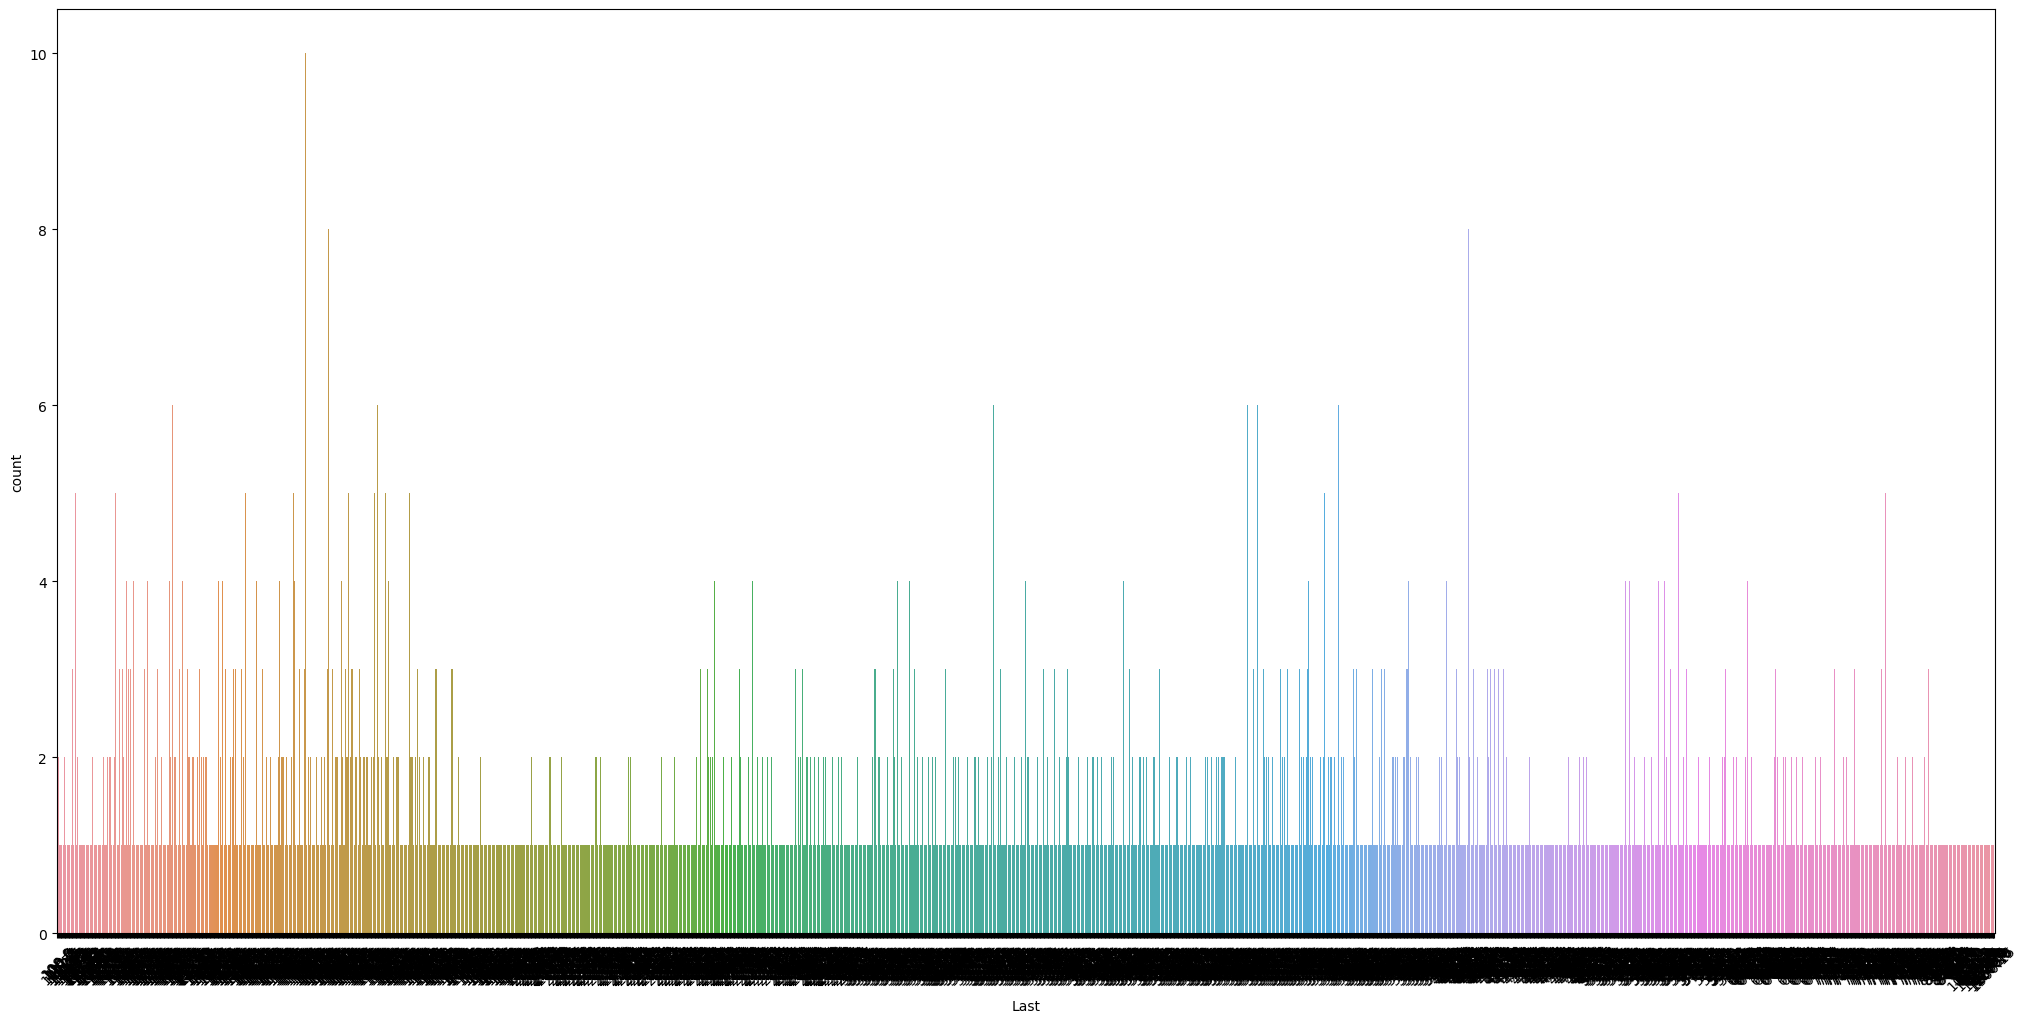

In [9]:
# Data based on the region is balanced
plt.figure(figsize=(25,12))
sns.countplot(x = 'Last',data = avo_df)
plt.xticks(rotation = 45)

In [11]:
avo_prophet = avo_df[['Date', 'Last']]
avo_prophet

,Date,Last
0,2007-11-27,959.0
1,2007-11-28,885.0
2,2007-11-29,887.0
3,2007-11-30,929.0
4,2007-12-03,980.0
...,...,...
3317,2021-04-26,729.2
3318,2021-04-27,748.6
3319,2021-04-28,743.4
3320,2021-04-29,746.4


# Preparing the data for prophet and train model


In [12]:
avo_prophet = avo_prophet.rename(columns={'Date':'ds', 'Last':'y'})

In [13]:
m = Prophet()
m.fit(avo_prophet)

18:40:14 - cmdstanpy - INFO - Chain [1] start processing
18:40:16 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
#forcast the future
future = m.make_future_dataframe(periods= 365)
forcast = m.predict(future)

In [15]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-11-27,1009.768152,888.100448,1069.872782,1009.768152,1009.768152,-27.808062,-27.808062,-27.808062,-2.027764,-2.027764,-2.027764,-25.780298,-25.780298,-25.780298,0.0,0.0,0.0,981.960090
1,2007-11-28,1007.799379,886.330592,1070.817855,1007.799379,1007.799379,-28.052216,-28.052216,-28.052216,-2.965141,-2.965141,-2.965141,-25.087076,-25.087076,-25.087076,0.0,0.0,0.0,979.747162
2,2007-11-29,1005.830605,885.704307,1072.532072,1005.830605,1005.830605,-26.874609,-26.874609,-26.874609,-2.465292,-2.465292,-2.465292,-24.409317,-24.409317,-24.409317,0.0,0.0,0.0,978.955996
3,2007-11-30,1003.861832,886.057185,1069.277576,1003.861832,1003.861832,-26.434170,-26.434170,-26.434170,-2.681681,-2.681681,-2.681681,-23.752489,-23.752489,-23.752489,0.0,0.0,0.0,977.427662
4,2007-12-03,997.955511,880.372215,1072.031543,997.955511,997.955511,-24.392520,-24.392520,-24.392520,-2.463979,-2.463979,-2.463979,-21.928541,-21.928541,-21.928541,0.0,0.0,0.0,973.562991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,2022-04-26,521.462981,333.336810,736.506312,333.824086,696.707566,7.447606,7.447606,7.447606,-2.027764,-2.027764,-2.027764,9.475370,9.475370,9.475370,0.0,0.0,0.0,528.910587
3683,2022-04-27,521.595978,329.409408,716.730379,332.916771,698.084297,5.315702,5.315702,5.315702,-2.965141,-2.965141,-2.965141,8.280842,8.280842,8.280842,0.0,0.0,0.0,526.911680
3684,2022-04-28,521.728975,324.141637,722.178557,332.085872,700.369852,4.607630,4.607630,4.607630,-2.465292,-2.465292,-2.465292,7.072923,7.072923,7.072923,0.0,0.0,0.0,526.336605
3685,2022-04-29,521.861972,321.397476,724.327297,331.254973,701.730438,3.202718,3.202718,3.202718,-2.681681,-2.681681,-2.681681,5.884399,5.884399,5.884399,0.0,0.0,0.0,525.064690


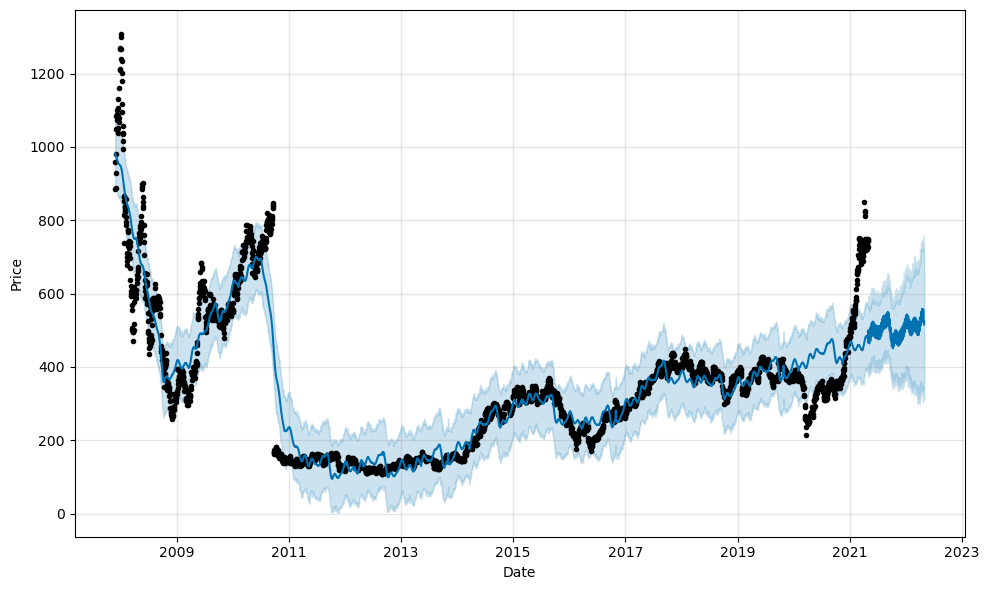

In [16]:
figure = m.plot(forcast, xlabel='Date', ylabel= 'Price')

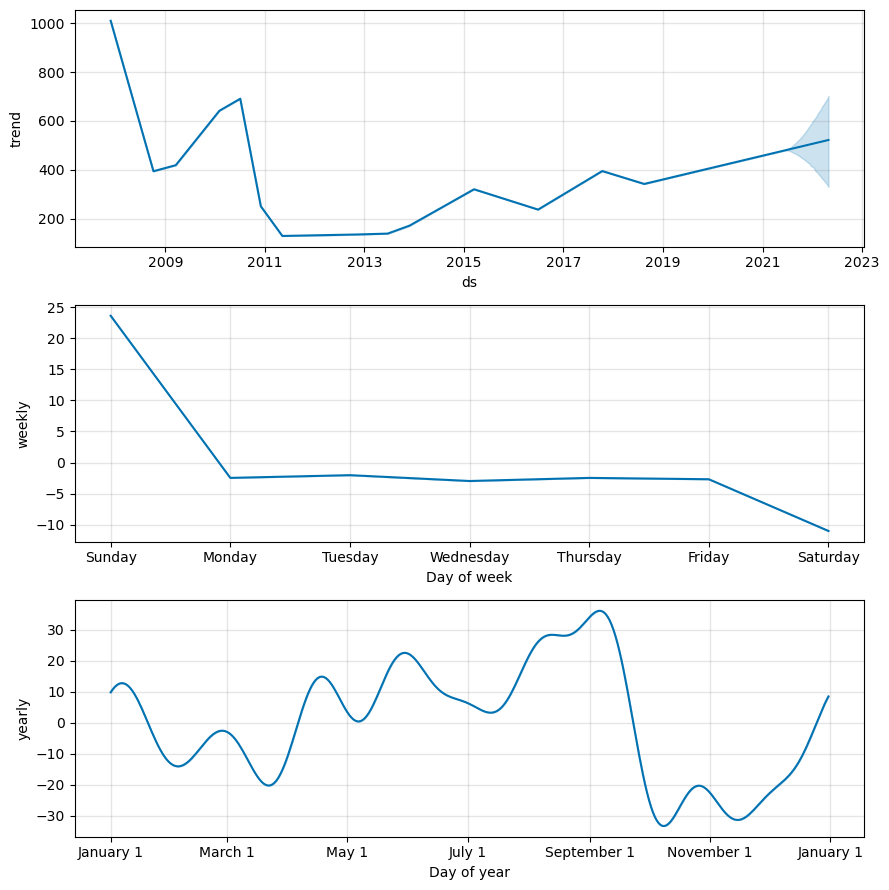

In [17]:
figure = m.plot_components(forcast)

# Region specific

In [20]:
avocado_df_sample = avo_df[avo_df['Symbol'] == 'ADANIPORTS']
avocado_df_sample

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
1023,2012-01-17,ADANIPORTS,EQ,135.50,137.1,141.00,135.00,140.1,140.00,138.13,1636196,2.260074e+13,18374.0,1004327,0.6138
1024,2012-01-18,ADANIPORTS,EQ,140.00,142.0,143.80,138.70,143.0,141.70,141.25,890591,1.257986e+13,15615.0,404925,0.4547
1025,2012-01-19,ADANIPORTS,EQ,141.70,144.0,150.55,143.15,149.5,149.40,146.72,1456077,2.136382e+13,31299.0,721545,0.4955
1026,2012-01-20,ADANIPORTS,EQ,149.40,151.9,157.60,150.25,155.4,155.40,153.76,1634070,2.512583e+13,23335.0,861145,0.5270
1027,2012-01-23,ADANIPORTS,EQ,155.40,155.4,155.40,145.10,146.4,146.75,149.54,1657609,2.478768e+13,12400.0,820653,0.4951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,2021-04-26,ADANIPORTS,EQ,725.35,733.0,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892
3318,2021-04-27,ADANIPORTS,EQ,730.75,735.0,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.0,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.2,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942


In [21]:
avocado_df_sample = avocado_df_sample.sort_values('Date')
avocado_df_sample

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
1023,2012-01-17,ADANIPORTS,EQ,135.50,137.1,141.00,135.00,140.1,140.00,138.13,1636196,2.260074e+13,18374.0,1004327,0.6138
1024,2012-01-18,ADANIPORTS,EQ,140.00,142.0,143.80,138.70,143.0,141.70,141.25,890591,1.257986e+13,15615.0,404925,0.4547
1025,2012-01-19,ADANIPORTS,EQ,141.70,144.0,150.55,143.15,149.5,149.40,146.72,1456077,2.136382e+13,31299.0,721545,0.4955
1026,2012-01-20,ADANIPORTS,EQ,149.40,151.9,157.60,150.25,155.4,155.40,153.76,1634070,2.512583e+13,23335.0,861145,0.5270
1027,2012-01-23,ADANIPORTS,EQ,155.40,155.4,155.40,145.10,146.4,146.75,149.54,1657609,2.478768e+13,12400.0,820653,0.4951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,2021-04-26,ADANIPORTS,EQ,725.35,733.0,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892
3318,2021-04-27,ADANIPORTS,EQ,730.75,735.0,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.0,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.2,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942


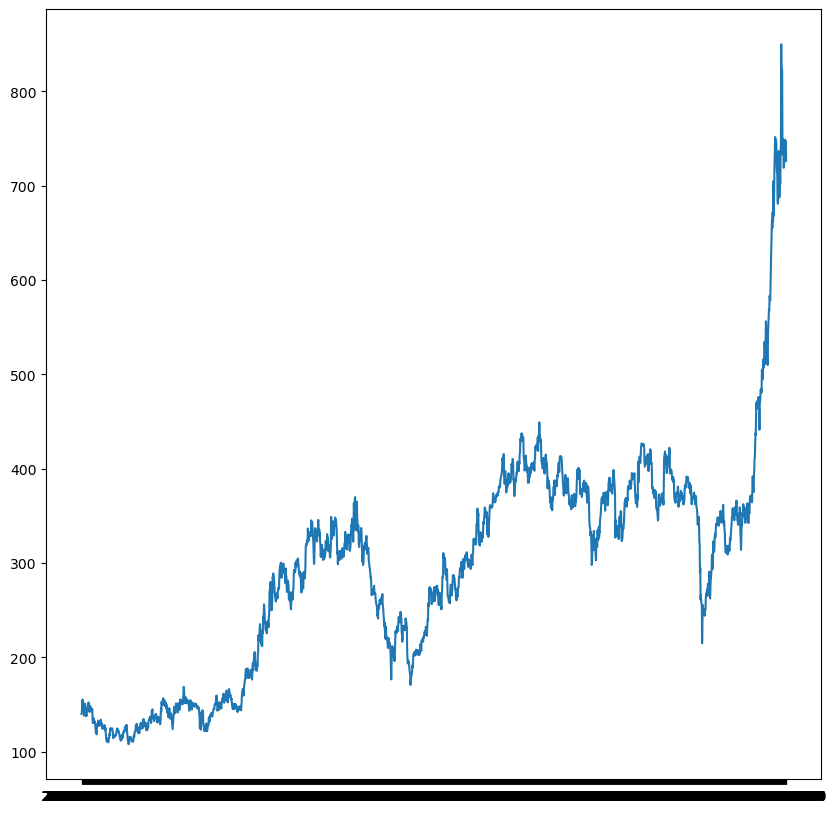

In [23]:
plt.figure(figsize=(10,10))
plt.plot(avocado_df_sample['Date'], avocado_df_sample['Last'])

In [24]:
avocado_df_sample = avocado_df_sample.rename(columns={'Date':'ds', 'Last':'y'})

In [25]:
m = Prophet()
m.fit(avocado_df_sample)
future = m.make_future_dataframe(periods= 365)

18:42:19 - cmdstanpy - INFO - Chain [1] start processing
18:42:19 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
forcast = m.predict(future)

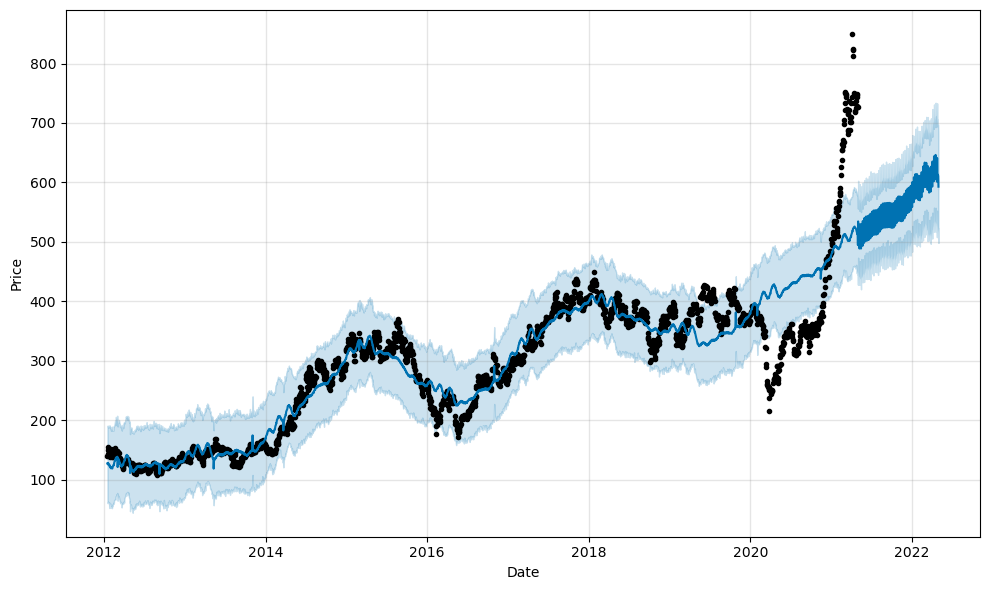

In [27]:
figure = m.plot(forcast, xlabel='Date', ylabel='Price')

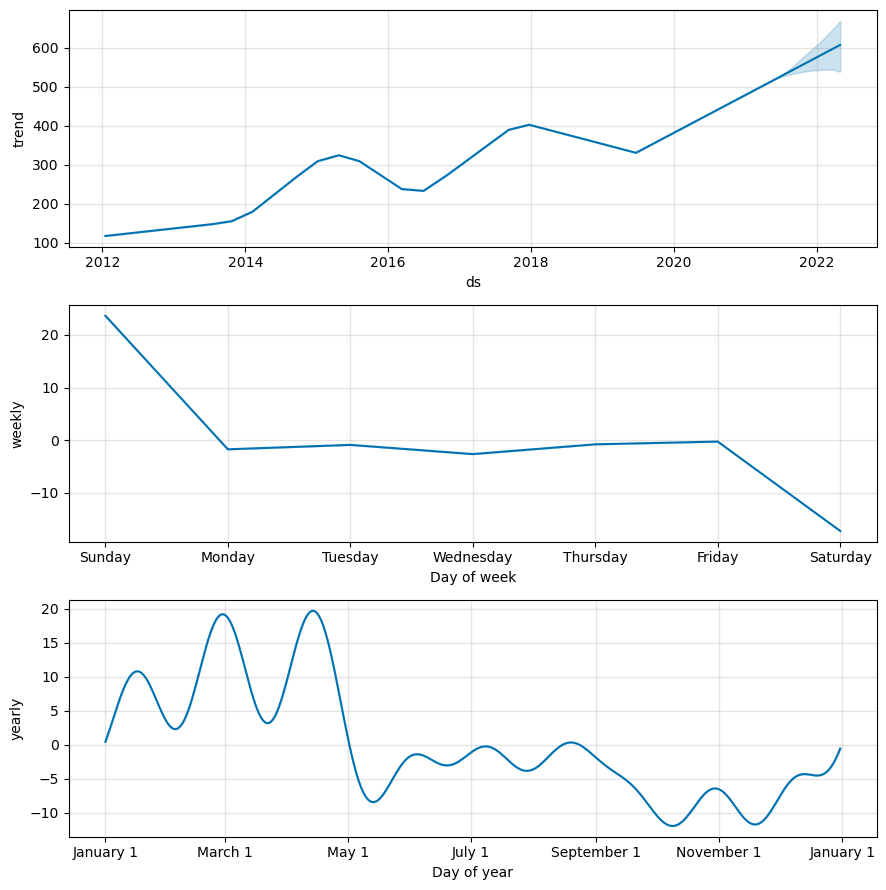

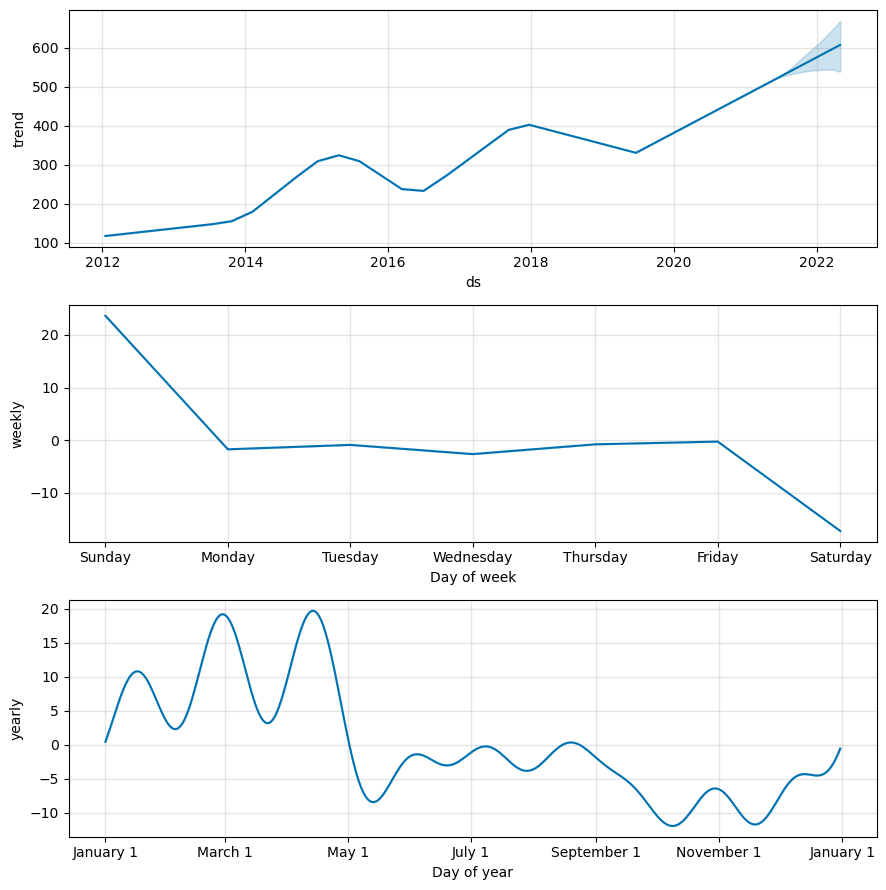

In [28]:
m.plot_components(forcast)